In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.metrics import accuracy_score
from tensorflow import keras

In [2]:
training_data=pd.read_csv('C:\Shubh\Study MAterial\ml\datasets\mnist\mnist_train.csv')
testing_data=pd.read_csv('C:\Shubh\Study MAterial\ml\datasets\mnist\mnist_test.csv')

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [3]:
ytest=np.array(testing_data['label'])
Xtest=np.array(testing_data.drop(['label'],axis=1))

In [4]:
y=np.array(training_data['label'])                      #y=training labels
Xdata=np.array(training_data.drop(['label'],axis=1))    #Xdata=training features                  
yorig=y                                                 #yorig=y(so it stores original y as we will do one hot encoding on y 
                                                        # So we need it to test accuracy on training data)

In [5]:
#doing one hot encoding
#train label=contains one hot encoded target variables
train_label=np.zeros((10,60000))
for col in range (60000):
    val=y[col]
    for row in range (10):
        if (val==row):
            train_label[val,col]=1
print("train_label shape="+str(np.shape(train_label)))
y=train_label.T

#scaling training and testing features by same scale
scaler=MinMaxScaler()
X=scaler.fit_transform(Xdata)
Xtest=scaler.fit_transform(Xtest)

train_label shape=(10, 60000)


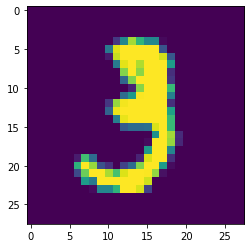

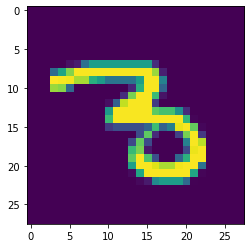

In [6]:
plt.imshow(X[10].reshape((28,28)))
plt.show()
plt.imshow(X[30].reshape((28,28)))

In [7]:
X=X.reshape(60000,28,28,1)
Xtest=Xtest.reshape(10000,28,28,1)

In [8]:
X.shape

(60000, 28, 28, 1)

In [9]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(32,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(64,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(128,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.Conv2D(128,3,strides=1,padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [ ]:
batch_size=64
epochs=20
model.fit(datagen.flow(X, y, batch_size=64),epochs=epochs,steps_per_epoch = X.shape[0] // batch_size)

Epoch 1/20
937/937 [==============================] - 25s 27ms/step - loss: 0.2198 - accuracy: 0.9295
Epoch 2/20
937/937 [==============================] - 25s 27ms/step - loss: 0.0808 - accuracy: 0.9762
Epoch 3/20
937/937 [==============================] - 26s 27ms/step - loss: 0.0645 - accuracy: 0.9811
Epoch 4/20
937/937 [==============================] - 24s 26ms/step - loss: 0.0544 - accuracy: 0.9837
Epoch 5/20
937/937 [==============================] - 26s 28ms/step - loss: 0.0506 - accuracy: 0.9856
Epoch 6/20
937/937 [==============================] - 26s 27ms/step - loss: 0.0470 - accuracy: 0.9860
Epoch 7/20
937/937 [==============================] - 24s 26ms/step - loss: 0.0412 - accuracy: 0.9879
Epoch 8/20
937/937 [==============================] - 24s 26ms/step - loss: 0.0413 - accuracy: 0.9881
Epoch 9/20
 21/937 [..............................] - ETA: 26s - loss: 0.0415 - accuracy: 0.9881

In [ ]:
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
model.summary()

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(datagen.flow(X, y, batch_size=64),epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
train_gen=datagen.flow(X, y, batch_size=64)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)

In [ ]:
epochs+=5
model.fit(train_gen,epochs=5,steps_per_epoch = X.shape[0] // 64)
pred=model.predict(Xtest)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
testaccuracy=accuracy_score(acc,ytest)
pred=model.predict(X)
acc=[]
for i in pred:
    k=list(i)
    acc.append(k.index(max(k)))
trainaccuracy=accuracy_score(acc,yorig)
print("Test accuracy is",testaccuracy*100)
print("Train accuracy is",trainaccuracy*100)
print("Batch size=",batch_size,"Epochs=",epochs)